### Analysis of User Data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb

In [44]:
openCloseData = pd.read_csv('openCloseData.csv')
print(openCloseData.shape)

(159996, 35)


In [45]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [46]:
openData = openCloseData[openCloseData['closed'] == 0]
closeData = openCloseData[openCloseData['closed'] == 1]
print((openData.shape, closeData.shape))

((80000, 35), (79996, 35))


In [47]:
sorted_open = openData.sort_values(by = 'UserId')

In [48]:
print(sorted_open[['UserId', 'experienceInTime', 'Upvotes', 'Downvotes', 'Views']].head(50))
# only experienceInTime is different even when userId is same

        UserId  experienceInTime  Upvotes  Downvotes  Views
125302      29              2454     5789        179   5163
141755     116              2768     2515         38  17943
151205     199              2753      725          0   1055
82478      199              2370      725          0   1055
96860      234              2445     3809        324   4718
88034      412              2563      276          0     95
99088      536              2378     2759        175   3835
87380      639              2084       43          0     99
116369     658              2197      657         47   9256
122823     658              2197      657         47   9256
125973     742              2118      694         11   1512
136580     775              2223     1318         55    656
109662     905              2509     2827        186   5361
87138      937              2298      689          8    234
140097     945              2035      208         12    333
154403     987              2398     129

In [49]:
open_data = openData[['UserId', 'Reputation', 'Views', 'Upvotes', 'Downvotes']].drop_duplicates()
close_data = closeData[['UserId', 'Reputation', 'Views', 'Upvotes', 'Downvotes']].drop_duplicates()

In [50]:
sorted_open = open_data.sort_values(by = 'UserId')
print(sorted_open.head(50))

        UserId  Reputation  Views  Upvotes  Downvotes
125302      29       74345   5163     5789        179
141755     116      168827  17943     2515         38
82478      199       11196   1055      725          0
96860      234       84307   4718     3809        324
88034      412         838     95      276          0
99088      536       41828   3835     2759        175
87380      639         170     99       43          0
116369     658       58199   9256      657         47
125973     742       33534   1512      694         11
136580     775       11031    656     1318         55
109662     905       90773   5361     2827        186
87138      937        3477    234      689          8
140097     945        5298    333      208         12
154403     987       33840   2215     1294        318
81537     1078       17159   1175     1935          4
107431    1094        2440    244      108          3
140341    1185       11308   2153     3499        166
117409    1363        8041  

### 1. Reputation

In [51]:
# When duplicates were not removed

# max_reputation_o = np.max(openData['Reputation'])
# min_reputation_o = np.min(openData['Reputation'])
# avg_reputation_o = np.mean(openData['Reputation'])
# max_reputation_c = np.max(closeData['Reputation'])
# min_reputation_c = np.min(closeData['Reputation'])
# avg_reputation_c = np.mean(closeData['Reputation'])
# print('Value\t\tOpen\t\tClose')
# print('Maximum\t\t' + str(max_reputation_o) + '\t\t' + str(max_reputation_c))
# print('Minimum\t\t' + str(min_reputation_o) + '\t\t' + str(min_reputation_c))
# print('Average\t\t' + str(avg_reputation_o) + '\t' + str(avg_reputation_c))
# print('Mode\t\t' + str(stat.mode(openData['Reputation'])) + '\t\t' + str(stat.mode(closeData['Reputation'])))
# print('Median\t\t' + str(stat.median(openData['Reputation'])) + '\t\t' + str(stat.median(closeData['Reputation'])))

# Value		Open		Close
# Maximum		670141		678046
# Minimum		1		1
# Average		1680.9328875	2355.232299114956
# Mode		1		1
# Median		157.0		93.0


In [52]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Reputation'])) + '\t\t\t' + str(max(close_data['Reputation'])))
print('Minimum\t\t' + str(min(open_data['Reputation'])) + '\t\t\t' + str(min(close_data['Reputation'])))
print('Average\t\t' + str(np.mean(open_data['Reputation'])) + '\t' + str(np.mean(close_data['Reputation'])))
print('Mode\t\t' + str(stat.mode(open_data['Reputation'])) + '\t\t\t' + str(stat.mode(close_data['Reputation'])))
print('Median\t\t' + str(stat.median(open_data['Reputation'])) + '\t\t\t' + str(stat.median(close_data['Reputation'])))

Value		Open			Close
Maximum		670141			678046
Minimum		1			1
Average		1315.7170886439317	1626.1674323351967
Mode		1			1
Median		115.0			69.0


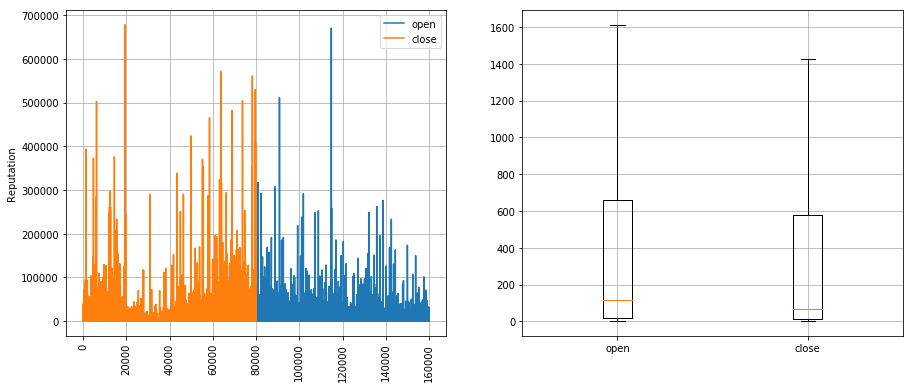

In [53]:
plt.figure(figsize=(15,6))

plt.title('General Trend in User\'s Reputation')
plt.subplot(1,2,1)
plt.plot(open_data['Reputation'], label = 'open')
plt.plot(close_data['Reputation'], label = 'close')
plt.xticks(rotation='vertical')
plt.ylabel('Reputation')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.boxplot([open_data['Reputation'],close_data['Reputation']], showfliers = False, labels = ['open', 'close'])
plt.grid(True)

plt.show()

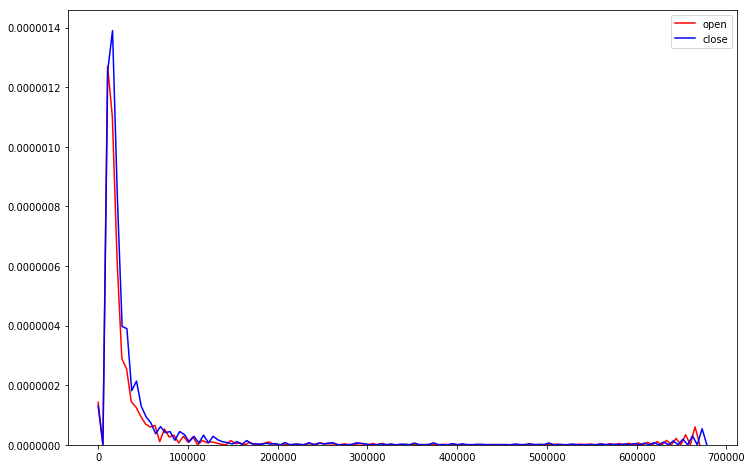

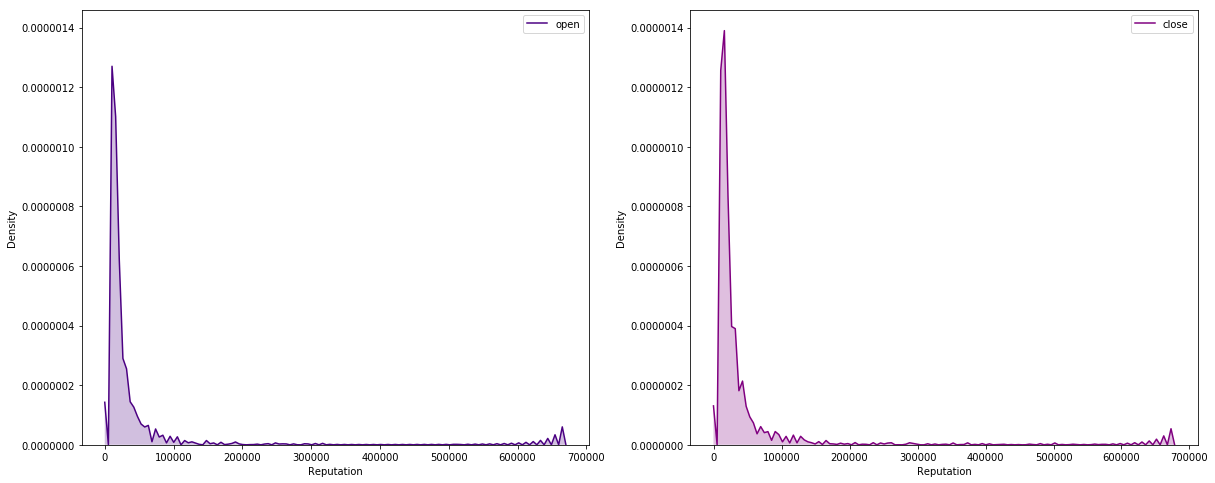

In [54]:
plt.figure(figsize=(12,8))
sb.kdeplot(open_data['Reputation'], label = 'open', color = 'r')
sb.kdeplot(close_data['Reputation'], label = 'close', color = 'b')
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(open_data['Reputation'], label = 'open', shade = True, color='indigo')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(close_data['Reputation'], label = 'close', shade = True,color='purple')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.show()

					No. of Questions vs User's Reputation



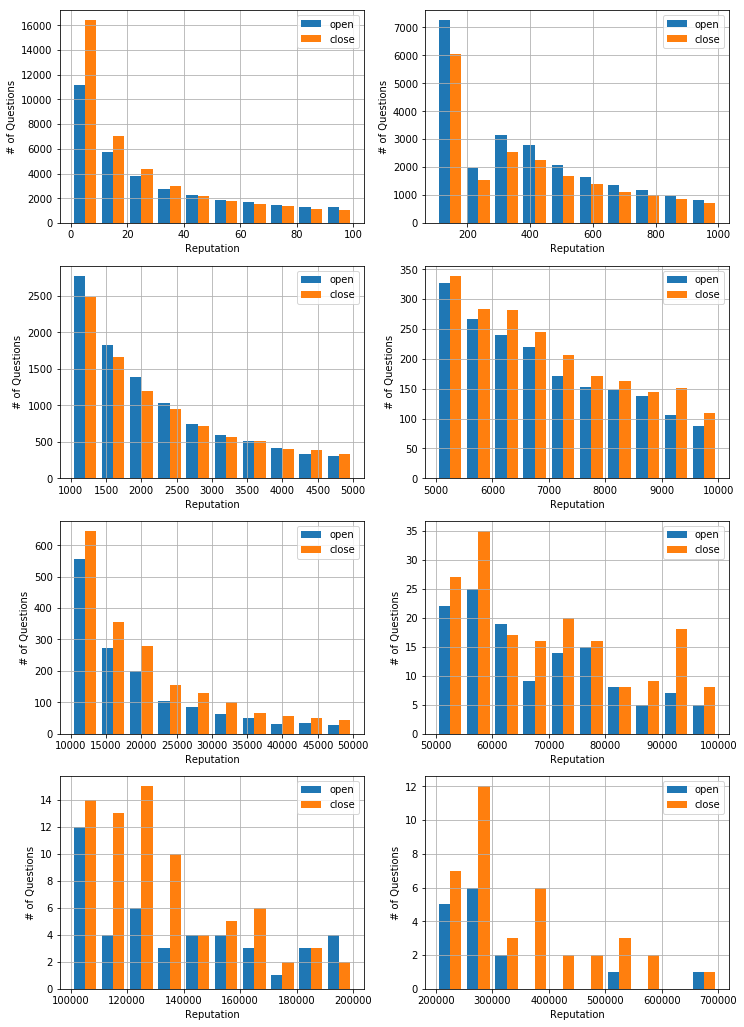

In [55]:
def hist_plot_range(min_value, max_value, col):
    """ To plot histogram using the 'col' field of Dataset for the values in the range 'min_value' - 'max_value' """
    plt.hist([open_data[col],close_data[col]], range=(min_value, max_value), label = ['open', 'close'])
    plt.xlabel(col)
    plt.ylabel('# of Questions')
    plt.grid(True)
    plt.legend()
  
print('\t\t\t\t\tNo. of Questions vs User\'s Reputation\n')

plt.figure(figsize = (12,18))
range_list = [(0,100),(100,1000),(1000,5000),(5000,10000),(10000,50000),(50000,100000),(100000,200000),(200000,700000)]

for i in range(8):
    plt.subplot(4, 2, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'Reputation')
    
plt.show()

# No. of close Questions < open Questions only when User Reputation is in range (40, approx. 4250) or (180000, 200000).

### 2. Experience

In [56]:
max_exp_o = np.max(openData['experienceInTime'])
min_exp_o = np.min(openData['experienceInTime'])
avg_exp_o = np.mean(openData['experienceInTime'])
max_exp_c = np.max(closeData['experienceInTime'])
min_exp_c = np.min(closeData['experienceInTime'])
avg_exp_c = np.mean(closeData['experienceInTime'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_exp_o) + '\t\t' + str(max_exp_c))
print('Minimum\t\t' + str(min_exp_o) + '\t\t' + str(min_exp_c))
print('Average\t\t' + str(avg_exp_o) + '\t' + str(avg_exp_c))
print('Mode\t\t' + str(stat.mode(openData['experienceInTime'])) + '\t\t' + str(stat.mode(closeData['experienceInTime'])))
print('Median\t\t' + str(stat.median(openData['experienceInTime'])) + '\t\t' + str(stat.median(closeData['experienceInTime'])))

Value		Open		Close
Maximum		2842		3717
Minimum		-261		-660
Average		585.9979	434.1321191059553
Mode		0		0
Median		411.0		195.0


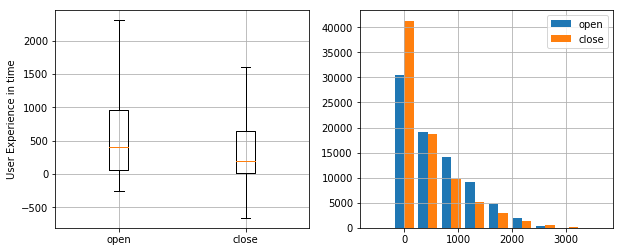

In [57]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot([openData['experienceInTime'], closeData['experienceInTime']], labels = ['open', 'close'], showfliers = False)
plt.ylabel('User Experience in time')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist([openData['experienceInTime'],closeData['experienceInTime']], label = ['open', 'close'])
plt.legend()
plt.grid(True)

plt.show()

### 3. Upvotes

In [58]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Upvotes'])) + '\t\t\t' + str(max(close_data['Upvotes'])))
print('Minimum\t\t' + str(min(open_data['Upvotes'])) + '\t\t\t' + str(min(close_data['Upvotes'])))
print('Average\t\t' + str(np.mean(open_data['Upvotes'])) + '\t' + str(np.mean(close_data['Upvotes'])))
print('Mode\t\t' + str(stat.mode(open_data['Upvotes'])) + '\t\t\t' + str(stat.mode(close_data['Upvotes'])))
print('Median\t\t' + str(stat.median(open_data['Upvotes'])) + '\t\t\t' + str(stat.median(close_data['Upvotes'])))

Value		Open			Close
Maximum		46408			29505
Minimum		0			0
Average		176.26096566770008	165.7820750539658
Mode		0			0
Median		14.0			8.0


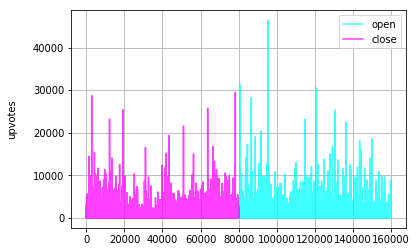

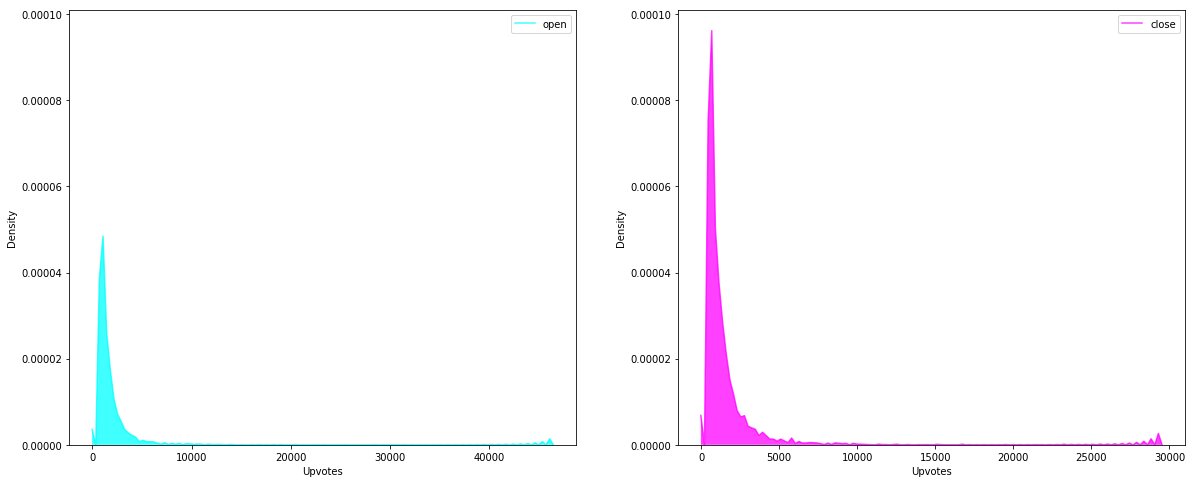

In [59]:
plt.figure()
plt.plot(open_data['Upvotes'], label = 'open', color='cyan', alpha=0.75)
plt.plot(close_data['Upvotes'], label = 'close', color='magenta', alpha=0.75)
plt.ylabel('upvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(open_data['Upvotes'], label = 'open', shade = True, color='cyan', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(close_data['Upvotes'], label = 'close', shade = True, color='magenta', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.show()

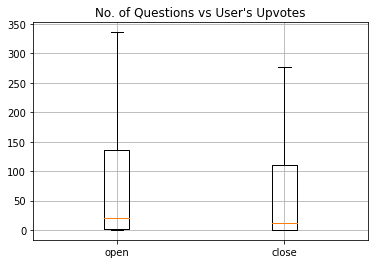

In [60]:
plt.figure()
plt.boxplot([openData['Upvotes'], closeData['Upvotes']], labels = ['open', 'close'], showfliers = False)
plt.title('No. of Questions vs User\'s Upvotes')
plt.grid(True)
plt.show()


### 4. Downvotes

In [61]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Downvotes'])) + '\t\t\t' + str(max(close_data['Downvotes'])))
print('Minimum\t\t' + str(min(open_data['Downvotes'])) + '\t\t\t' + str(min(close_data['Downvotes'])))
print('Average\t\t' + str(np.mean(open_data['Downvotes'])) + '\t' + str(np.mean(close_data['Downvotes'])))
print('Mode\t\t' + str(stat.mode(openData['Downvotes'])) + '\t\t\t' + str(stat.mode(closeData['Downvotes'])))
print('Median\t\t' + str(stat.median(openData['Downvotes'])) + '\t\t\t' + str(stat.median(closeData['Downvotes'])))

Value		Open			Close
Maximum		24219			66837
Minimum		0			0
Average		17.81593753588242	17.910970277301157
Mode		0			0
Median		0.0			0.0


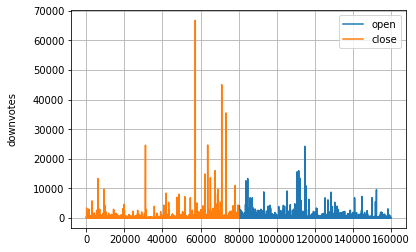

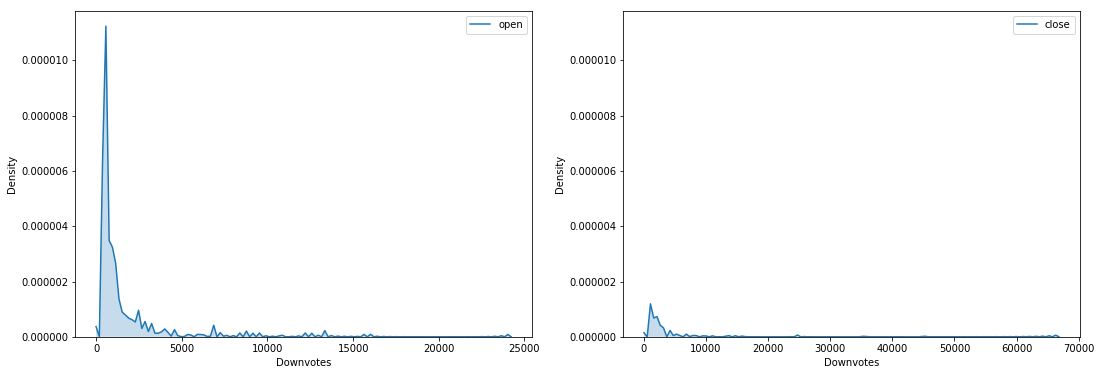

In [63]:
plt.figure()

plt.plot(open_data['Downvotes'], label = 'open')
plt.plot(close_data['Downvotes'], label = 'close')
plt.ylabel('downvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (18,6))
ax = plt.subplot(1,2,1)
sb.kdeplot(open_data['Downvotes'], label = 'open', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(close_data['Downvotes'], label = 'close', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.show()

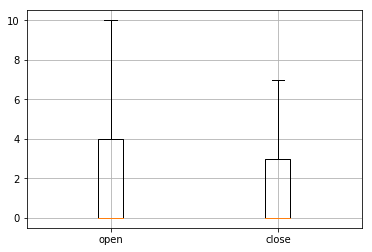

In [64]:
plt.figure()
plt.boxplot([openData['Downvotes'], closeData['Downvotes']], labels = ['open', 'close'], showfliers = False)
plt.grid(True)
plt.show()

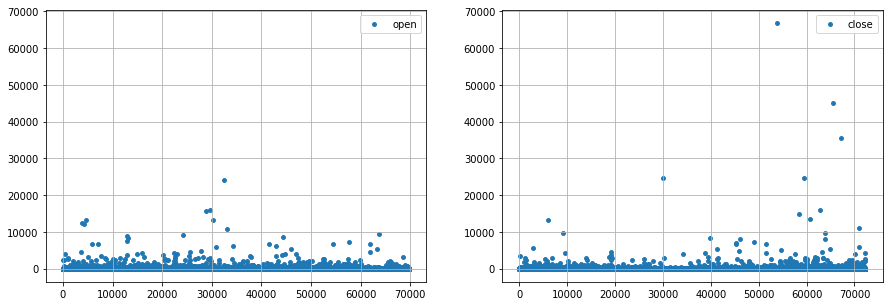

In [65]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(open_data['Downvotes'])), open_data['Downvotes'], label = 'open', s = 15)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(close_data['Downvotes'])), close_data['Downvotes'], label = 'close', s = 15)
plt.legend()
plt.grid(True)

plt.show()

### 5. Views

In [66]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Views'])) + '\t\t\t' + str(max(close_data['Views'])))
print('Minimum\t\t' + str(min(open_data['Views'])) + '\t\t\t' + str(min(close_data['Views'])))
print('Average\t\t' + str(np.mean(open_data['Views'])) + '\t' + str(np.mean(close_data['Views'])))
print('Mode\t\t' + str(stat.mode(open_data['Views'])) + '\t\t\t' + str(stat.mode(close_data['Views'])))
print('Median\t\t' + str(stat.median(open_data['Views'])) + '\t\t\t' + str(stat.median(close_data['Views'])))

Value		Open			Close
Maximum		133100			157537
Minimum		0			0
Average		192.56767424503388	232.0731167321636
Mode		1			1
Median		31.0			24.0


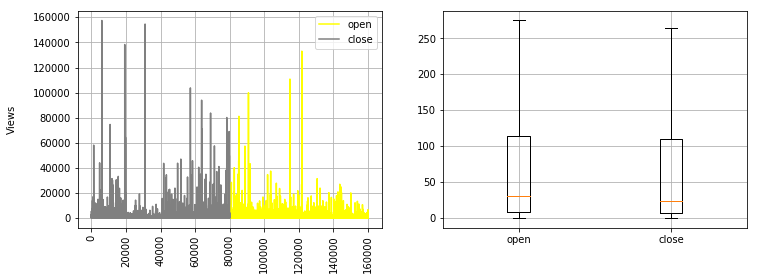

In [67]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(open_data['Views'], label = 'open', color='yellow')
plt.plot(close_data['Views'], label = 'close', color='grey')
plt.ylabel('Views\n')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.boxplot([open_data['Views'],close_data['Views']], labels = ['open', 'close'], showfliers = False)
plt.grid(True)

plt.show()

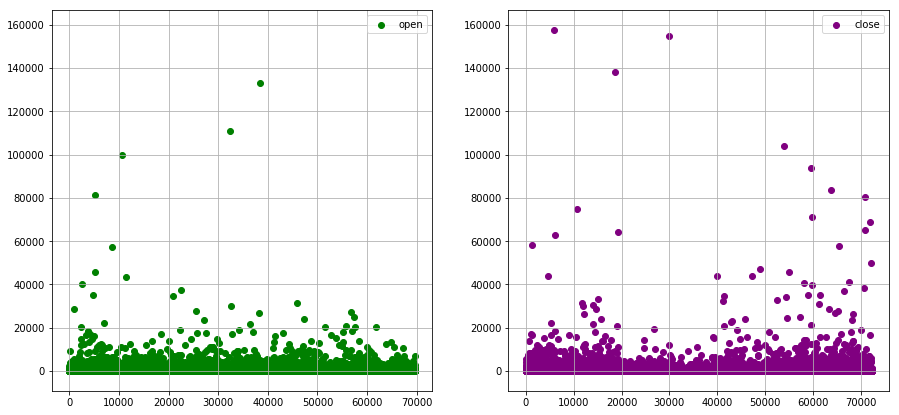

In [68]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(open_data['Views'])), open_data['Views'], label = 'open', color='green')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(close_data['Views'])), close_data['Views'], label = 'close', color='purple')
plt.legend()
plt.grid(True)

plt.show()